## Maschinen Daten generieren

Verteilung der Qualitätsstufen:
Qualität
gut         4704
mittel       190
schlecht     106
Name: count, dtype: int64

Beispieldaten (erste 10 Zeilen):
   Bandgeschwindigkeit   Füllmenge  Versiegelungstemperatur  \
0            32.483571  241.524806               164.822579   
1            29.308678  240.931718               170.417508   
2            33.238443  214.087137               166.039284   
3            37.615149  243.398196               176.656271   
4            28.829233  264.656582               192.957678   
5            28.829315  224.515358               163.434368   
6            37.896064  270.969653               190.012307   
7            33.837174  259.755496               163.274919   
8            27.652628  235.315334               162.285592   
9            32.712800  247.169407               187.278919   

   Versiegelungsdruck  Versiegelungszeit  Schneidkraft  Folienspannung  \
0            3.428288           2.104486    122.563103       17.077712   
1     

C:\Users\michi\AppData\Local\Temp\ipykernel_24532\304486256.py:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Qualität', data=df_verpackung, palette='viridis')
C:\Users\michi\AppData\Local\Temp\ipykernel_24532\304486256.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Qualität', y=param, data=df_verpackung, palette='viridis')
C:\Users\michi\AppData\Local\Temp\ipykernel_24532\304486256.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Qualität', y=param, data=df_verpackung, palette='viridis')
C:\Users\michi\AppData\Loc

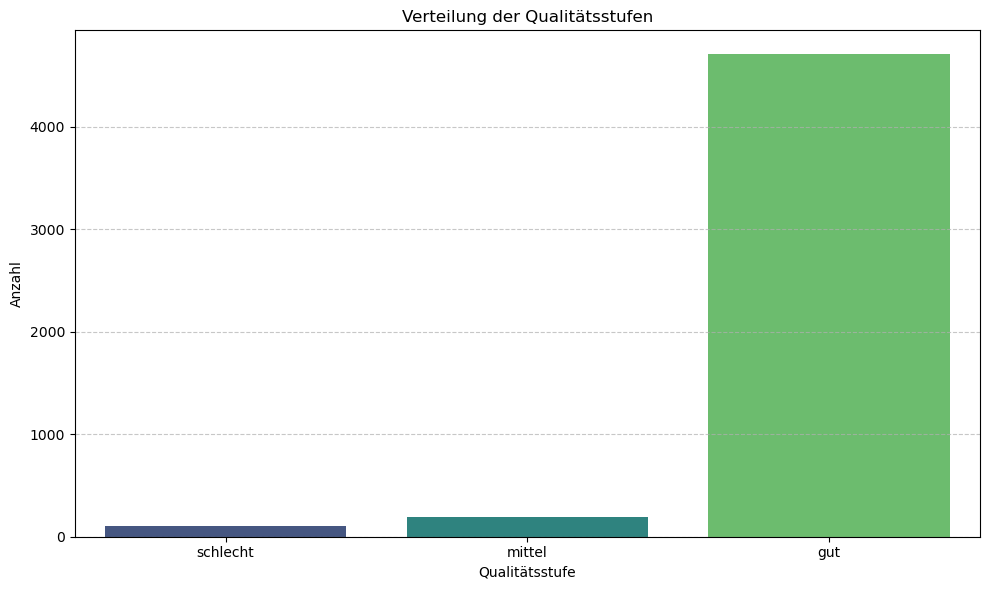

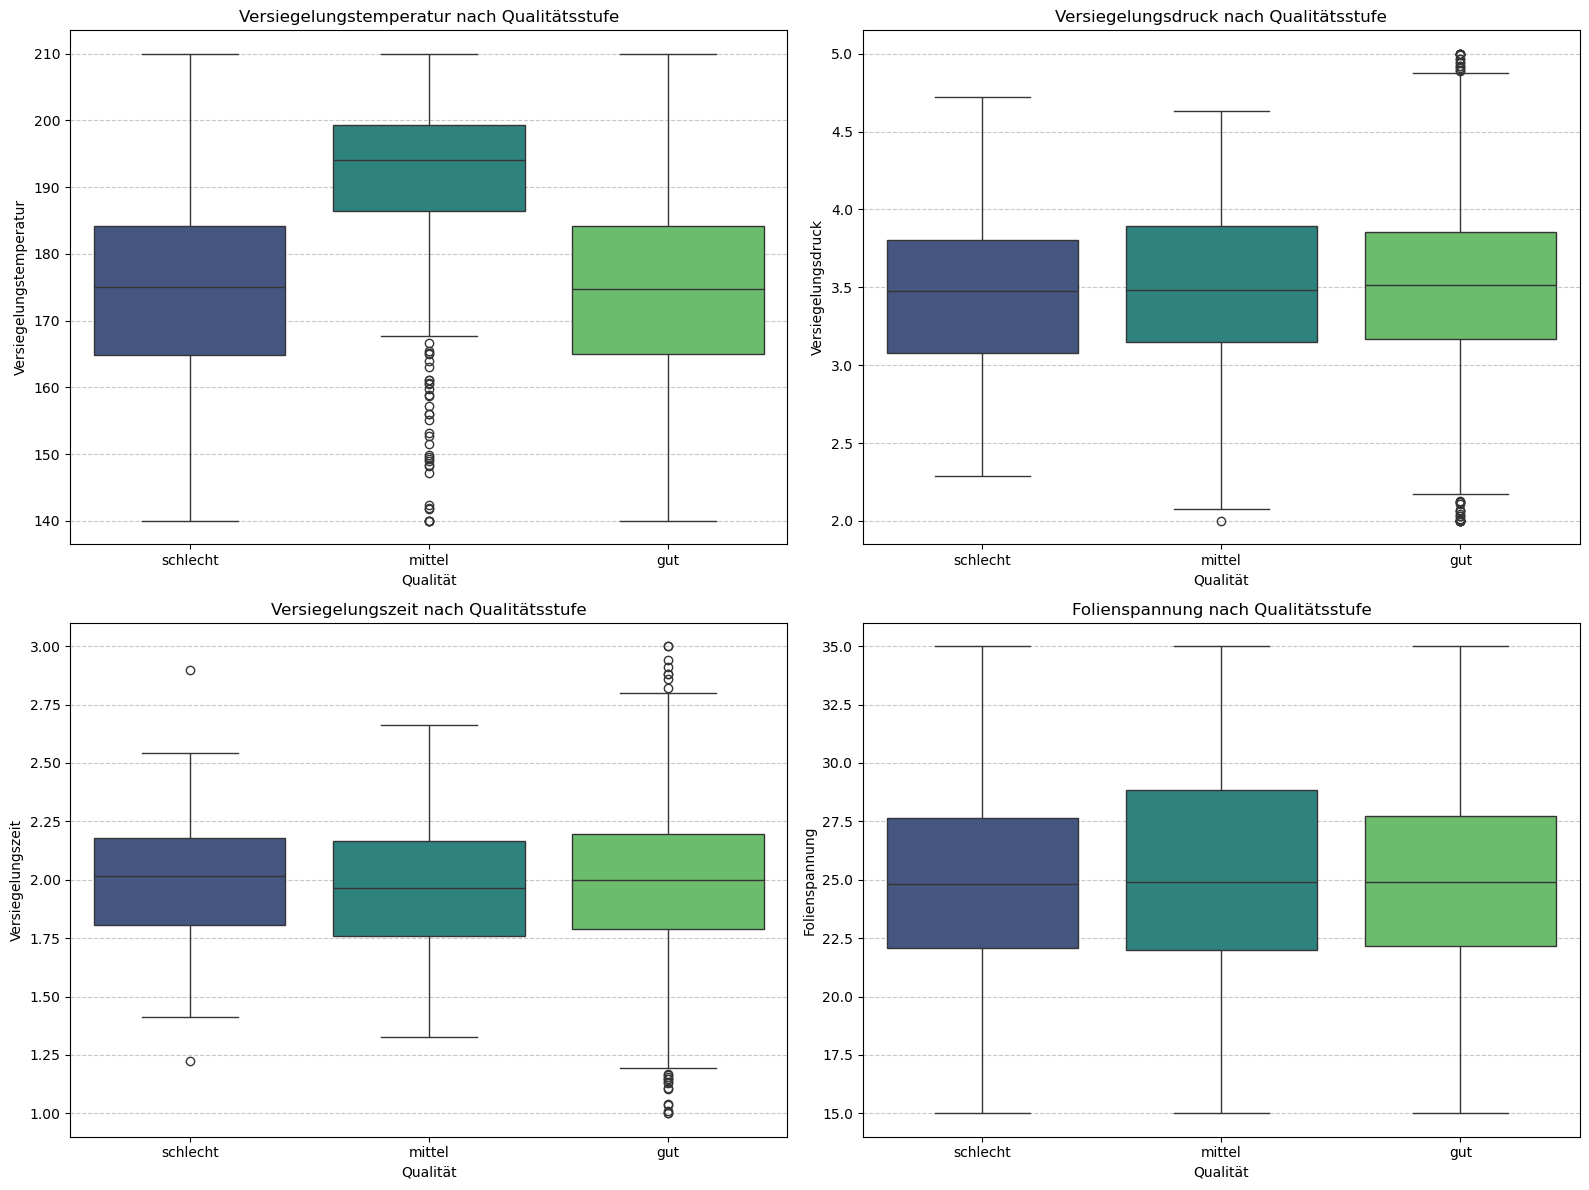

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Seed für Reproduzierbarkeit
np.random.seed(42)
random.seed(42)

# Definition der 15 Maschinenparameter mit realistischen Wertebereichen
def generiere_verpackungsmaschinen_daten(anzahl_einträge=5000):
    """
    Generiert einen realistischen Datensatz für eine Verpackungsmaschine mit 15 Parametern
    und einer dreistufigen Qualitätsbewertung (schlecht, mittel, gut).
    
    Die Daten enthalten kausale Beziehungen zwischen Parametern und der Endqualität.
    """
    data = {}
    
    # 1. Hauptprozessparameter
    data['Bandgeschwindigkeit'] = np.random.normal(30, 5, anzahl_einträge).clip(15, 45)           # m/min
    data['Füllmenge'] = np.random.normal(250, 20, anzahl_einträge).clip(200, 300)                 # g
    data['Versiegelungstemperatur'] = np.random.normal(175, 15, anzahl_einträge).clip(140, 210)   # °C
    data['Versiegelungsdruck'] = np.random.normal(3.5, 0.5, anzahl_einträge).clip(2.0, 5.0)       # bar
    data['Versiegelungszeit'] = np.random.normal(2.0, 0.3, anzahl_einträge).clip(1.0, 3.0)        # s
    
    # 2. Sekundäre Prozessparameter
    data['Schneidkraft'] = np.random.normal(120, 15, anzahl_einträge).clip(80, 160)               # N
    data['Folienspannung'] = np.random.normal(25, 4, anzahl_einträge).clip(15, 35)                # N
    data['Vakuumstärke'] = np.random.normal(50, 10, anzahl_einträge).clip(20, 80)                 # mbar
    data['Gasmischung'] = np.random.normal(30, 8, anzahl_einträge).clip(10, 50)                   # %
    data['Formatbreite'] = np.random.normal(150, 20, anzahl_einträge).clip(100, 200)              # mm
    
    # 3. Umgebungs- und Materialparameter
    data['Formatlänge'] = np.random.normal(220, 25, anzahl_einträge).clip(150, 290)               # mm
    data['Umgebungstemperatur'] = np.random.normal(22, 3, anzahl_einträge).clip(15, 30)           # °C
    data['Luftfeuchtigkeit'] = np.random.normal(60, 10, anzahl_einträge).clip(40, 80)             # %
    data['Foliendicke'] = np.random.normal(50, 5, anzahl_einträge).clip(40, 70)                   # µm
    data['Produktgewicht'] = np.random.normal(200, 25, anzahl_einträge).clip(150, 250)            # g
    
    # Erstellen eines DataFrames
    df = pd.DataFrame(data)
    
    # Füge eine eindeutige ID für jede Verpackung hinzu
    df['Verpackungs_ID'] = range(1, anzahl_einträge + 1)
    
    # Implementierung kausaler Beziehungen für die Qualitätsberechnung
    
    # Zwischengrößen, die in der Realität nicht direkt gemessen werden, aber kausal wichtig sind
    
    # 1. Effektive Versiegelungstemperatur (beeinflusst durch nominelle Temp, Umgebungstemp, Foliendicke)
    effektive_temperatur = (
        data['Versiegelungstemperatur'] * 0.8 + 
        data['Umgebungstemperatur'] * 0.1 + 
        data['Foliendicke'] * 0.1 + 
        np.random.normal(0, 3, anzahl_einträge)
    )
    
    # 2. Effektive Folienspannung
    effektive_spannung = (
        data['Folienspannung'] * 0.9 + 
        (- 0.05 * (data['Umgebungstemperatur'] - 22)) +  # Höhere Temp verringert effektive Spannung
        (0.05 * (data['Luftfeuchtigkeit'] - 60)) +       # Höhere Luftfeuchtigkeit erhöht Spannung
        np.random.normal(0, 1, anzahl_einträge)
    )
    
    # 3. Materialeigenschaften (abhängig von Foliendicke, Umgebungsbedingungen)
    materialeignung = (
        85 +  # Basiswert
        -0.5 * abs(data['Foliendicke'] - 55) +  # Optimale Dicke ist 55µm
        -0.3 * abs(data['Umgebungstemperatur'] - 21) +  # Optimale Umgebungstemp ist 21°C
        -0.2 * abs(data['Luftfeuchtigkeit'] - 55) +     # Optimale Luftfeuchtigkeit ist 55%
        np.random.normal(0, 5, anzahl_einträge)
    )
    
    # Hauptqualitätsfaktoren berechnen
    
    # 1. Siegelqualität (wichtigster Faktor)
    siegelqualität = (
        100 +  # Basiswert
        -0.5 * abs(effektive_temperatur - (150 + 0.6 * data['Foliendicke'])) +  # Optimale Temp abhängig von Foliendicke
        2.0 * data['Versiegelungsdruck'] +  # Mehr Druck = bessere Siegelung (im normalen Bereich)
        10.0 * data['Versiegelungszeit'] +  # Längere Zeit = bessere Siegelung
        -0.2 * data['Bandgeschwindigkeit'] +  # Geringere Geschwindigkeit = bessere Siegelung
        np.random.normal(0, 8, anzahl_einträge)
    ).clip(0, 100)
    
    # 2. Formqualität (zweiter wichtiger Faktor)
    formqualität = (
        100 +  # Basiswert
        -0.3 * abs(data['Formatbreite'] - 150) +  # Abweichungen vom optimalen Format (150mm)
        -0.2 * abs(data['Formatlänge'] - 220) +   # Abweichungen vom optimalen Format (220mm)
        -0.3 * abs(effektive_spannung - 25) +     # Optimale Spannung ist 25
        -0.2 * abs(data['Bandgeschwindigkeit'] - 28) +  # Optimale Geschwindigkeit ist 28
        -0.4 * abs(data['Schneidkraft'] - 120) +        # Optimale Schneidkraft ist 120
        np.random.normal(0, 7, anzahl_einträge)
    ).clip(0, 100)
    
    # 3. Verpackungsstabilität (dritter Faktor)
    stabilität = (
        100 +  # Basiswert
        -0.2 * abs(data['Füllmenge'] - data['Produktgewicht']) +  # Differenz zw. Füllmenge und Produktgewicht
        0.8 * data['Vakuumstärke'] / 80 +  # Stärkeres Vakuum = mehr Stabilität
        -0.3 * data['Gasmischung'] / 50 +  # Gas verringert Stabilität etwas
        -0.2 * abs(materialeignung - 85) +  # Materialeignung beeinflusst Stabilität
        np.random.normal(0, 6, anzahl_einträge)
    ).clip(0, 100)
    
    # Gewichtete Gesamtqualität berechnen (50% Siegelqualität, 30% Formqualität, 20% Stabilität)
    gesamtqualität = (
        0.5 * siegelqualität +
        0.3 * formqualität +
        0.2 * stabilität
    )
    
    # Qualitätsstufen definieren:
    # - schlecht: < 60
    # - mittel: 60-80
    # - gut: > 80
    df['Qualität_Numerisch'] = gesamtqualität
    df['Qualität'] = pd.cut(
        gesamtqualität, 
        bins=[0, 60, 80, 100], 
        labels=['schlecht', 'mittel', 'gut']
    )
    
    # Erzeugen von "natürlichen" Fehlermustern
    # Einige systematische Zusammenhänge einfügen, die zu schlechter Qualität führen
    
    # 1. Zu hohe Temperatur bei dünner Folie führt zu Verbrennungen/Löchern
    problem_idx = np.where((data['Versiegelungstemperatur'] > 190) & 
                          (data['Foliendicke'] < 45))[0]
    if len(problem_idx) > 0:
        df.loc[problem_idx, 'Qualität_Numerisch'] *= 0.7  # Reduzierte Qualität
        df.loc[problem_idx, 'Qualität'] = pd.cut(
            df.loc[problem_idx, 'Qualität_Numerisch'], 
            bins=[0, 60, 80, 100], 
            labels=['schlecht', 'mittel', 'gut']
        )
    
    # 2. Zu niedrige Versiegelungszeit und Druck führen zu undichten Verpackungen
    problem_idx = np.where((data['Versiegelungszeit'] < 1.3) & 
                         (data['Versiegelungsdruck'] < 2.5))[0]
    if len(problem_idx) > 0:
        df.loc[problem_idx, 'Qualität_Numerisch'] *= 0.75  # Reduzierte Qualität
        df.loc[problem_idx, 'Qualität'] = pd.cut(
            df.loc[problem_idx, 'Qualität_Numerisch'], 
            bins=[0, 60, 80, 100], 
            labels=['schlecht', 'mittel', 'gut']
        )
    
    # 3. Hohe Geschwindigkeit bei hoher Folienspannung führt zu Rissen
    problem_idx = np.where((data['Bandgeschwindigkeit'] > 38) & 
                         (data['Folienspannung'] > 30))[0]
    if len(problem_idx) > 0:
        df.loc[problem_idx, 'Qualität_Numerisch'] *= 0.8  # Reduzierte Qualität
        df.loc[problem_idx, 'Qualität'] = pd.cut(
            df.loc[problem_idx, 'Qualität_Numerisch'], 
            bins=[0, 60, 80, 100], 
            labels=['schlecht', 'mittel', 'gut']
        )
    
    # 4. Zufällige "extreme" Ausreißer (z.B. Materialmängel, Stromausfälle, etc.)
    random_problem_idx = np.random.choice(anzahl_einträge, size=int(anzahl_einträge * 0.02), replace=False)  # 2% zufällige Probleme
    df.loc[random_problem_idx, 'Qualität_Numerisch'] *= np.random.uniform(0.4, 0.6, size=len(random_problem_idx))
    df.loc[random_problem_idx, 'Qualität'] = pd.cut(
        df.loc[random_problem_idx, 'Qualität_Numerisch'], 
        bins=[0, 60, 80, 100], 
        labels=['schlecht', 'mittel', 'gut']
    )
    
    return df

# Datensatz generieren
df_verpackung = generiere_verpackungsmaschinen_daten(5000)

# Überprüfen der Verteilung der Qualitätsstufen
qualitätsstufen_verteilung = df_verpackung['Qualität'].value_counts()
print("Verteilung der Qualitätsstufen:")
print(qualitätsstufen_verteilung)

# Zeigen einiger Beispieldaten an
print("\nBeispieldaten (erste 10 Zeilen):")
print(df_verpackung.head(10))

# Statistische Zusammenfassung
print("\nStatistische Zusammenfassung:")
print(df_verpackung.describe())

# Speichern des Datensatzes
df_verpackung.to_csv('verpackungsmaschine_datensatz_5000.csv', index=False)
print("\nDatensatz wurde als 'verpackungsmaschine_datensatz_5000.csv' gespeichert")

# Visualisierung der Verteilung der Qualitätsstufen
plt.figure(figsize=(10, 6))
sns.countplot(x='Qualität', data=df_verpackung, palette='viridis')
plt.title('Verteilung der Qualitätsstufen')
plt.xlabel('Qualitätsstufe')
plt.ylabel('Anzahl')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Visualisierung der Parameter-Verteilungen nach Qualitätsstufen für die 4 wichtigsten Parameter
wichtige_parameter = ['Versiegelungstemperatur', 'Versiegelungsdruck', 'Versiegelungszeit', 'Folienspannung']

plt.figure(figsize=(16, 12))
for i, param in enumerate(wichtige_parameter):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Qualität', y=param, data=df_verpackung, palette='viridis')
    plt.title(f'{param} nach Qualitätsstufe')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Der Datensatz hat folgende Eigenschaften:

### Maschinenparameter (15)

1. **Hauptprozessparameter**:
   - Bandgeschwindigkeit (m/min)
   - Füllmenge (g)
   - Versiegelungstemperatur (°C)
   - Versiegelungsdruck (bar)
   - Versiegelungszeit (s)

2. **Sekundäre Prozessparameter**:
   - Schneidkraft (N)
   - Folienspannung (N)
   - Vakuumstärke (mbar)
   - Gasmischung (%)
   - Formatbreite (mm)

3. **Umgebungs- und Materialparameter**:
   - Formatlänge (mm)
   - Umgebungstemperatur (°C)
   - Luftfeuchtigkeit (%)
   - Foliendicke (µm)
   - Produktgewicht (g)

### Qualitätsstufen

Die Gesamtqualität wird in drei einfache Kategorien eingeteilt:
- **Schlecht**: Qualitätswert < 60
- **Mittel**: Qualitätswert zwischen 60-80
- **Gut**: Qualitätswert > 80

### Kausale Beziehungen

Der Datensatz enthält realistische kausale Beziehungen:

1. **Verborgene Zwischengrößen** (als Teil der Datenlogik implementiert):
   - Effektive Versiegelungstemperatur
   - Effektive Folienspannung
   - Materialeignung

2. **Qualitätsfaktoren** (gewichtet zur Gesamtqualität):
   - Siegelqualität (50%)
   - Formqualität (30%)
   - Verpackungsstabilität (20%)

3. **Problemmuster**:
   - Zu hohe Temperatur bei dünner Folie → Verbrennungen/Löcher
   - Niedrige Versiegelungszeit + niedriger Druck → undichte Verpackungen
   - Hohe Geschwindigkeit + hohe Spannung → Materialrisse
   - Zufällige Ausreißer (simuliert Materialfehler, Störungen, etc.)

Der Datensatz ist für Causal AI-Analysen geeignet, da er nicht nur Korrelationen, sondern auch kausale Beziehungen enthält, die durch die Algorithmen entdeckt werden können.